Data Preprocessing

In [54]:
import pandas as pd
rain = pd.read_csv('./ACC - Rain -Albert Park Acc rainfall_20220818-20230818.csv', parse_dates=['Timestamp'])
rain.head()

,Timestamp,UTC Offset,Multiple Gauge Rainfall Recency Alarm (on/off),Quality,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2
0,2022-08-18 14:20:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
1,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
2,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
3,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic
4,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic


In [55]:
moist = pd.read_csv('./ACC - Soil Moisture - Mt Albert Grammar Rain_20220818-20230818_5mins.csv', parse_dates=['Timestamp'])
moist.head()

,Timestamp,UTC Offset,Soil Moisture Content (%V/V),Quality
0,2022-08-18 14:25:00,12,NaN,No data available
1,2022-08-18 14:30:00,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available
4,2022-08-18 14:45:00,12,52.1,No quality or non-verified


In [56]:
mtalbert = rain.merge(moist, on='Timestamp')
mtalbert.head()

,Timestamp,UTC Offset_x,Multiple Gauge Rainfall Recency Alarm (on/off),Quality_x,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2,UTC Offset_y,Soil Moisture Content (%V/V),Quality_y
0,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,NaN,No data available
1,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,NaN,No data available
4,2022-08-18 14:45:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,52.1,No quality or non-verified


In [57]:
mtalbert.drop(columns=['UTC Offset_x', 'Multiple Gauge Rainfall Recency Alarm (on/off)','Quality_x', 'Quality.1', 'Quality.2', 'UTC Offset_y', 'Quality_y'], inplace=True)
mtalbert.head()

,Timestamp,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
0,2022-08-18 14:25:00,NaN,0.0,NaN
1,2022-08-18 14:30:00,NaN,0.0,52.1
2,2022-08-18 14:35:00,2.5,2.5,NaN
3,2022-08-18 14:40:00,NaN,2.5,NaN
4,2022-08-18 14:45:00,NaN,2.5,52.1


In [58]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [59]:
print(mtalbert.isnull().sum())


Timestamp                            0
Rainfall (mm)                   102303
Rainfall (Accumulated) (mm)          0
Soil Moisture Content (%V/V)     70377
dtype: int64


In [60]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [61]:
print(mtalbert['Rainfall (mm)'].unique())


[ nan  2.5  0.5  1.   3.   1.5  2.   3.5  4.   5.   4.5  8.   6.   5.5
  7.5  6.5  9.  10.   8.5  9.5 11.5  7. ]


In [62]:
mtalbert['Soil Moisture Content (%V/V)'].isna().sum()

70377

In [63]:
# mtalbert['Rainfall (mm)'] = pd.to_numeric(mtalbert['Rainfall (mm)'], errors='coerce')
mtalbert['Rainfall (mm)'] = mtalbert['Rainfall (mm)'].fillna(0)


In [64]:
mtalbert['Soil Moisture Content (%V/V)'] = mtalbert['Soil Moisture Content (%V/V)'].interpolate(method='linear')
mtalbert.isna().sum()

Timestamp                       0
Rainfall (mm)                   0
Rainfall (Accumulated) (mm)     0
Soil Moisture Content (%V/V)    1
dtype: int64

In [65]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 105154 non-null  float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  105153 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [66]:
print(mtalbert['Rainfall (mm)'].head())


0    0.0
1    0.0
2    2.5
3    0.0
4    0.0
Name: Rainfall (mm), dtype: float64


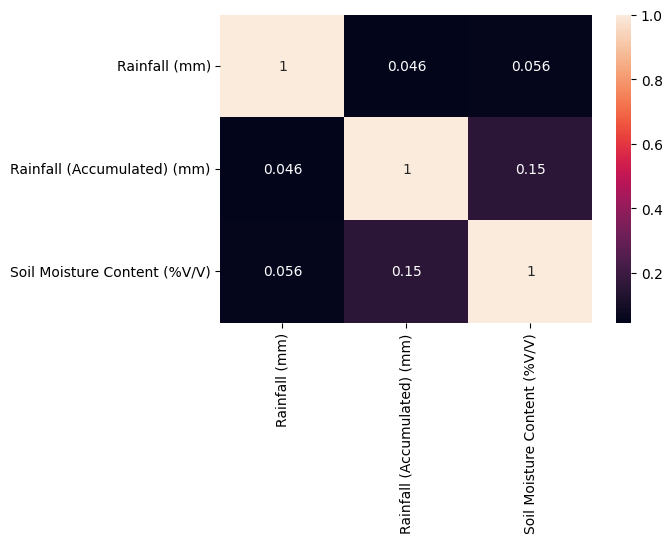

In [67]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables
mtalbert = mtalbert.set_index('Timestamp')
# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = mtalbert.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 4))
sns.heatmap(mtalbert.corr(), annot=True)
plt.show()

<Axes: xlabel='Timestamp'>

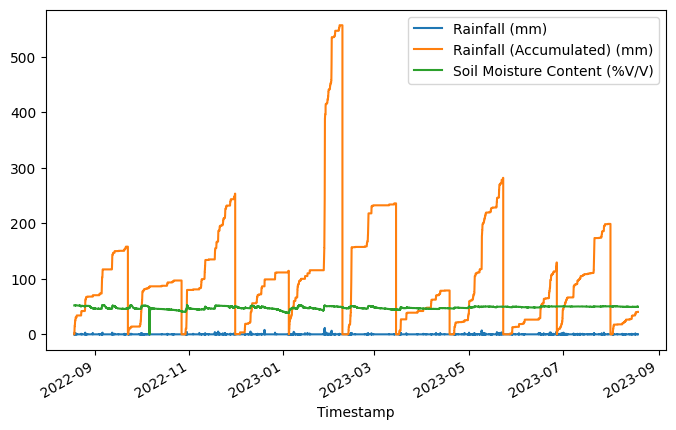

In [68]:
mtalbert.plot(figsize=(8, 5))

In [69]:
mtalbert.describe()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
count,105154.000000,105154.000000,105153.000000
mean,0.020408,104.130238,48.080289
std,0.184752,99.493476,2.552800
min,0.000000,0.000000,0.000000
25%,0.000000,34.000000,46.488000
50%,0.000000,84.500000,48.294000
75%,0.000000,135.000000,50.136000
max,11.500000,557.000000,52.805000


In [70]:
mtalbert.head()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
Timestamp,,,
2022-08-18 14:25:00,0.0,0.0,NaN
2022-08-18 14:30:00,0.0,0.0,52.1
2022-08-18 14:35:00,2.5,2.5,52.1
2022-08-18 14:40:00,0.0,2.5,52.1
2022-08-18 14:45:00,0.0,2.5,52.1


Lag Features

In [71]:
lag_size = 14

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    mtalbert[f'Rainfall_lag_{i}'] = mtalbert['Rainfall (mm)'].shift(i)

# Create lag features for 'Rainfall (Accumulated) (mm)'
for i in range(1, lag_size + 1):
    mtalbert[f'Rainfall_Accumulated_lag_{i}'] = mtalbert['Rainfall (Accumulated) (mm)'].shift(i)

# Create lag features for 'Soil Moisture Content (%V/V)'
for i in range(1, lag_size + 1):
    mtalbert[f'Soil_Moisture_lag_{i}'] = mtalbert['Soil Moisture Content (%V/V)'].shift(i)

mtalbert.dropna(inplace=True)  # Drop rows with NaN values in the lag features

Split Data

In [72]:
print(mtalbert.columns)


Index(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)',
       'Soil Moisture Content (%V/V)', 'Rainfall_lag_1', 'Rainfall_lag_2',
       'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5', 'Rainfall_lag_6',
       'Rainfall_lag_7', 'Rainfall_lag_8', 'Rainfall_lag_9', 'Rainfall_lag_10',
       'Rainfall_lag_11', 'Rainfall_lag_12', 'Rainfall_lag_13',
       'Rainfall_lag_14', 'Rainfall_Accumulated_lag_1',
       'Rainfall_Accumulated_lag_2', 'Rainfall_Accumulated_lag_3',
       'Rainfall_Accumulated_lag_4', 'Rainfall_Accumulated_lag_5',
       'Rainfall_Accumulated_lag_6', 'Rainfall_Accumulated_lag_7',
       'Rainfall_Accumulated_lag_8', 'Rainfall_Accumulated_lag_9',
       'Rainfall_Accumulated_lag_10', 'Rainfall_Accumulated_lag_11',
       'Rainfall_Accumulated_lag_12', 'Rainfall_Accumulated_lag_13',
       'Rainfall_Accumulated_lag_14', 'Soil_Moisture_lag_1',
       'Soil_Moisture_lag_2', 'Soil_Moisture_lag_3', 'Soil_Moisture_lag_4',
       'Soil_Moisture_lag_5', 'Soil_Moisture_lag

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features and target
X = mtalbert.drop(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)', 'Soil Moisture Content (%V/V)'], axis=1)
y = mtalbert['Rainfall (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# XGBoost

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


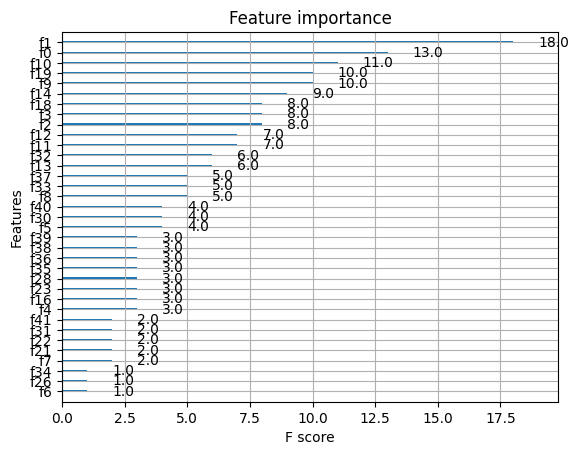

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [74]:
import xgboost as xgb
from xgboost import plot_importance

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Plot feature importance
plot_importance(xgb_model)
plt.show()


# Train the model on the selected features
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
xgb_predictions_train = xgb_model.predict(X_train_scaled)

# Make predictions on the test set
xgb_predictions_test = xgb_model.predict(X_test_scaled)

# Calculate RMSE for training set
rmse_train = sqrt(mean_squared_error(y_train, xgb_predictions_train))

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train, xgb_predictions_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, xgb_predictions_train)

# Calculate R2 score for training set
r2_train = r2_score(y_train, xgb_predictions_train)

# Print the metrics for the training set
print("XGBoost Training Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("R2 Score:", r2_train)

# Calculate RMSE for test set
rmse_test = sqrt(mean_squared_error(y_test, xgb_predictions_test))

# Calculate MAE for test set
mae_test = mean_absolute_error(y_test, xgb_predictions_test)

# Calculate MSE for test set
mse_test = mean_squared_error(y_test, xgb_predictions_test)

# Calculate R2 score for test set
r2_test = r2_score(y_test, xgb_predictions_test)

# Print the metrics for the test set
print("\nXGBoost Test Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("R2 Score:", r2_test)

XGBoost Training Set Metrics:
Root Mean Squared Error (RMSE): 0.17142128018902203
Mean Absolute Error (MAE): 0.030663273249582977
Mean Squared Error (MSE): 0.029385255301643196
R2 Score: 0.16654970463202645

XGBoost Test Set Metrics:
Root Mean Squared Error (RMSE): 0.15359314034537777
Mean Absolute Error (MAE): 0.030177705308706962
Mean Squared Error (MSE): 0.023590852761154916
R2 Score: 0.19637511873760816


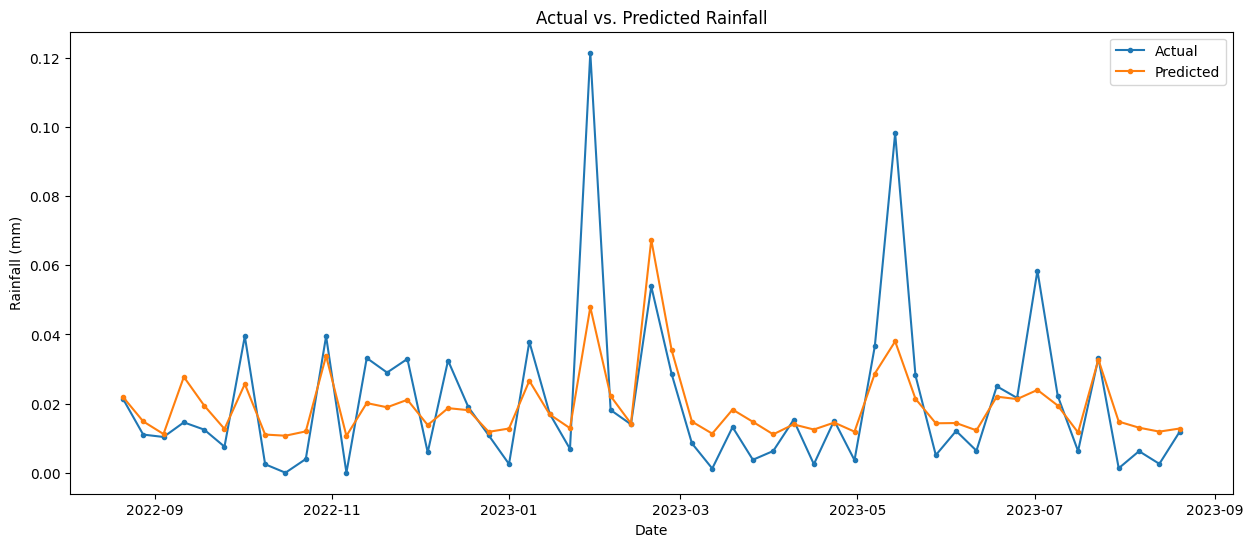

In [77]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_predictions_test}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Rainfall')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()

plt.show()

In [78]:
# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

In [79]:
timestamp_column = 'Timestamp'

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_predictions_test}, index=X_test.index)

# Resample data to a monthly frequency
result_df_monthly = result_df.resample('M').mean()

# Calculate monthly median rainfall for predicted values
monthly_median_predicted = result_df_monthly['Predicted'].groupby(result_df_monthly.index.month).median()

# Calculate the percentage of predicted rainfall compared to the monthly median
result_df_monthly['rainfall_percentage_predicted'] = (
    result_df_monthly['Predicted'] / monthly_median_predicted[result_df_monthly.index.month].values
) * 100

# Apply the categorization function to create a new column with the weather condition for predicted values
result_df_monthly['weather_condition_predicted'] = result_df_monthly['rainfall_percentage_predicted'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions for predicted values
print(result_df_monthly[['Actual', 'Predicted', 'rainfall_percentage_predicted', 'weather_condition_predicted']])

              Actual  Predicted  rainfall_percentage_predicted  \
Timestamp                                                        
2022-08-31  0.014539   0.015824                     111.077026   
2022-09-30  0.011939   0.018536                     100.000000   
2022-10-31  0.016935   0.018768                     100.000000   
2022-11-30  0.023740   0.017744                     100.000000   
2022-12-31  0.014634   0.015160                     100.000000   
2023-01-31  0.042881   0.025290                     100.000000   
2023-02-28  0.029958   0.035593                     100.000000   
2023-03-31  0.004548   0.013420                     100.000000   
2023-04-30  0.009259   0.013070                     100.000000   
2023-05-31  0.039741   0.024765                     100.000000   
2023-06-30  0.023395   0.018941                     100.000000   
2023-07-31  0.016930   0.019116                     100.000000   
2023-08-31  0.006633   0.012668                      88.922981   

         